In [1]:
import requests
from bs4 import BeautifulSoup
from urllib.request import urlopen 
import pandas as pd

In [2]:
from requests import get
url = 'https://www.divcommpunecovid.com/ccsbeddashboard/hsr?d-3677810-p=1'
response = requests.get(url)
print(response.text[:500])



<?xml version="1.0"?>
<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">
<html xmlns="http://www.w3.org/1999/xhtml">
<head>

<link type="text/css" href="/ccsbeddashboard/css/displaytag.css" rel="stylesheet" />
<meta http-equiv="Content-Type" content="text/html; charset=UTF-8" />
<meta name="description" content="Covid Care Software: Divisional Commissioner, Pune,CCS CCS Bed Dashboard  "/>
<meta name="keywords" content="divcom


In [23]:
list_of_hospitals=[]

for i in range(1,4):
    url = 'https://www.divcommpunecovid.com/ccsbeddashboard/hsr?d-3677810-p='+str(i)
    response = requests.get(url)
    content=response.content
    html_soup = BeautifulSoup(response.text, 'html.parser')
    hospital_containers_odd = html_soup.find_all('tr', class_ = 'odd')
    print(len(hospital_containers_odd))
    hospital_containers_even= html_soup.find_all('tr', class_ = 'even')
    print(len(hospital_containers_even))
    list_of_containers_odd = list(hospital_containers_odd)
    list_of_containers_even = list(hospital_containers_even)
    list_of_hospitals=list_of_hospitals+list_of_containers_odd
    list_of_hospitals=list_of_hospitals+list_of_containers_even
    print(len(list_of_hospitals))
 


50
50
100
50
50
200
19
18
237


In [24]:
print(len(list_of_hospitals))

237


In [33]:
rows=[]
for x in list_of_hospitals:
    a=x.td
    b=a.find_next_sibling("td")
    district=b.text
    
    c=b.find_next_sibling("td")
    area=c.text
    
    d=c.find_next_sibling("td")
    hospital_category=d.text
  
    e=d.find_next_sibling("td")
    hospital_details=e.text[1:48]
    z=hospital_details.split(sep="\n")
    hospital_details=z[0]
    
    f=e.find_next_sibling("td")
    officials=f.text
    
    g=f.find_next_sibling("td")
    charges=g.text
    
    h=g.find_next_sibling("td")
    free_regulated_beds=h.text
    
    i=h.find_next_sibling("td")
    total_bed_allocated_capacity=i.text
    
    j=i.find_next_sibling("td")
    Allocated_Bed_for_Isolation_without_Oxygen=j.text
    
    k=j.find_next_sibling("td")
    Vacant_Bed_of_Isolation_without_Oxygen=k.text
    aa=Vacant_Bed_of_Isolation_without_Oxygen.split(sep=" ")
    Vacant_Bed_of_Isolation_without_Oxygen=aa[0]
    
    l=k.find_next_sibling("td")
    AllocatedIsolationwith_Oxygen=l.text
    
    m=l.find_next_sibling("td")
    VacantIsolationwithOxygen=m.text
    aa=VacantIsolationwithOxygen.split(sep=" ")
    VacantIsolationwithOxygen=aa[0]
    
    n=m.find_next_sibling("td")
    AllocatedBedforICUWithoutVentilator=n.text
    
    o=n.find_next_sibling("td")
    VacantBedofICUWithoutVentilator=o.text
    aa=VacantBedofICUWithoutVentilator.split(sep=" ")
    VacantBedofICUWithoutVentilator=aa[0]
    
    p=o.find_next_sibling("td")
    AllocatedofICUBedsWithVentilator=p.text
    
    
    q=p.find_next_sibling("td")
    VacantICUBedsWithVentilator=q.text
    aa=VacantICUBedsWithVentilator.split(sep=" ")
    VacantICUBedsWithVentilator=aa[0]
 
    rows.append([district,area,hospital_category,hospital_details,charges,int(free_regulated_beds),
                 int(total_bed_allocated_capacity),int(Allocated_Bed_for_Isolation_without_Oxygen),
                 int(Vacant_Bed_of_Isolation_without_Oxygen),int(AllocatedIsolationwith_Oxygen),
                 int(VacantIsolationwithOxygen),int(AllocatedBedforICUWithoutVentilator),
                 int(VacantBedofICUWithoutVentilator),int(AllocatedofICUBedsWithVentilator),
                 int(VacantICUBedsWithVentilator)])


In [34]:
columns=["district","area","hospital_category","hospital_details","charges","free_regulated_beds",
         "total_bed_allocated_capacity","Allocated_Bed_for_Isolation_without_Oxygen",
         "Vacant_Bed_of_Isolation_without_Oxygen","Allocated_Isolation_with_Oxygen","Vacant_Isolation_with_Oxygen",
         "Allocated_Bed_for_ICU_Without_Ventilator","Vacant_Bed_of_ICU_Without_Ventilator",
         "Allocated_of_ICU_Beds_With_Ventilator","Vacant_ICU_Beds_With_Ventilator"]
df = pd.DataFrame(rows, columns=columns)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 15 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   district                                    237 non-null    object
 1   area                                        237 non-null    object
 2   hospital_category                           237 non-null    object
 3   hospital_details                            237 non-null    object
 4   charges                                     237 non-null    object
 5   free_regulated_beds                         237 non-null    int64 
 6   total_bed_allocated_capacity                237 non-null    int64 
 7   Allocated_Bed_for_Isolation_without_Oxygen  237 non-null    int64 
 8   Vacant_Bed_of_Isolation_without_Oxygen      237 non-null    int64 
 9   Allocated_Isolation_with_Oxygen             237 non-null    int64 
 10  Vacant_Isolation_with_Oxyg

In [35]:
df.head()

,district,area,hospital_category,hospital_details,charges,free_regulated_beds,total_bed_allocated_capacity,Allocated_Bed_for_Isolation_without_Oxygen,Vacant_Bed_of_Isolation_without_Oxygen,Allocated_Isolation_with_Oxygen,Vacant_Isolation_with_Oxygen,Allocated_Bed_for_ICU_Without_Ventilator,Vacant_Bed_of_ICU_Without_Ventilator,Allocated_of_ICU_Beds_With_Ventilator,Vacant_ICU_Beds_With_Ventilator
0,Pune,PMC,DCH,Army Institute of Cardithorasic Sciences AICTS,Government Free,0,400,350,242,0,0,30,1,20,0
1,Pune,PMC,DCH,Sasoon,Government Free,0,547,0,0,419,0,5,0,123,0
2,Pune,PMC,DCHC,Naidu Hospital,Government Free,0,155,78,0,70,0,0,0,7,0
3,Pune,PMC,CCC,Balewadi- Gents Hostel,Government Free,0,140,140,0,0,0,0,0,0,0
4,Pune,PMC,CCC,COEP Hostel Shivajinagar,Government Free,0,150,150,150,0,0,0,0,0,0


In [28]:
df.to_csv('covid_bed_vaccancy.csv')
df.to_excel('covid_bed_vaccancy_excel.xls')

In [ ]:
import pandas as pd
covid=pd.read_csv(r'\Users\Admin\covid_bed_vaccancy.csv', sep=',')

In [38]:
import mysql.connector
from pandas.io import sql
import MySQLdb

In [17]:
import mysql.connector
mydb= mysql.connector.connect(
        host = 'localhost',
        port=3307,
        user= 'root',
        password='corinne')
print(mydb)

In [19]:
mycursor = mydb.cursor()
mycursor.execute('create database covid')
mycursor.execute('show databases')
for x in mycursor:
    print(x)

('corinne',)
('corinnedaup',)
('covid',)
('information_schema',)
('mysql',)
('performance_schema',)
('sakila',)
('sales_dw',)
('supermarket',)
('sys',)
('test',)
('world',)


In [20]:
mycursor.execute('use covid')
mycursor.execute('create table covid_bed_availability(district varchar(100),area varchar(100),
                 hospital_category varchar(100),hospital_details varchar(200),charges varchar(100),
                 free_regulated_beds varchar(100),total_bed_allocated_capacity int,
                 Allocated_Bed_for_Isolation_without_Oxygen int, Vacant_Bed_of_Isolation_without_Oxygen int ,
                 Allocated_Isolation_with_Oxygen int,Vacant_Isolation_with_Oxygen int,
                 Allocated_Bed_for_ICU_Without_Ventilator int, Vacant_Bed_of_ICU_Without_Ventilator int,
                 Allocated_of_ICU_Beds_With_Ventilator int,Vacant_ICU_Beds_With_Ventilator int)')
mycursor.execute('show tables')
for x in mycursor:
    print(x)

('covid_bed_availability',)


In [26]:
subset = covid[covid.columns.values]
tuples = [tuple(x) for x in subset.values]
query='insert into covid_bed_availability(district ,area ,hospital_category ,hospital_details ,charges ,free_regulated_beds ,total_bed_allocated_capacity ,Allocated_Bed_for_Isolation_without_Oxygen , Vacant_Bed_of_Isolation_without_Oxygen  ,Allocated_Isolation_with_Oxygen ,Vacant_Isolation_with_Oxygen,Allocated_Bed_for_ICU_Without_Ventilator, Vacant_Bed_of_ICU_Without_Ventilator, Allocated_of_ICU_Beds_With_Ventilator,Vacant_ICU_Beds_With_Ventilator) values (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s)'
for x in tuples:
    mycursor.execute(query,x)
mydb.commit()
print(mycursor.rowcount,'record inserted')

1 record inserted


In [27]:
mycursor.execute('select * from covid_bed_availability ')
for x in mycursor:
    print(x)

('Pune', 'PMC', 'DCH', 'Army Institute of Cardithorasic Sciences AICTS', 'Government Free', '0', 400, 350, 242, 0, 0, 30, 1, 20, 0)
('Pune', 'PMC', 'DCH', 'Sasoon', 'Government Free', '0', 547, 0, 0, 419, 0, 5, 0, 123, 0)
('Pune', 'PMC', 'DCHC', 'Naidu Hospital', 'Government Free', '0', 155, 78, 0, 70, 0, 0, 0, 7, 0)
('Pune', 'PMC', 'CCC', 'Balewadi- Gents Hostel', 'Government Free', '0', 140, 140, 0, 0, 0, 0, 0, 0, 0)
('Pune', 'PMC', 'CCC', 'COEP Hostel Shivajinagar', 'Government Free', '0', 150, 150, 150, 0, 0, 0, 0, 0, 0)
('Pune', 'PMC', 'CCC', 'NICMAR - Millenium Boys', 'Government Free', '0', 397, 397, 397, 0, 0, 0, 0, 0, 0)
('Pune', 'PMC', 'CCC', 'NICMAR - Silver', 'Government Free', '0', 150, 150, 150, 0, 0, 0, 0, 0, 0)
('Pune', 'PMC', 'CCC', 'Rakshak Nagar Stadium', 'Government Free', '0', 125, 125, 23, 0, 0, 0, 0, 0, 0)
('Pune', 'PMC', 'CCC', 'Sinhgad College Kondhwa Pune', 'Government Free', '0', 400, 400, 61, 0, 0, 0, 0, 0, 0)
('Pune', 'PMC', 'CCC', 'Sinhgad Hostel Panhala',

In [2]:
import pandas as pd
covid=pd.read_csv(r'\Users\Admin\covid_bed_vaccancy.csv', sep=',')

In [3]:
covid.head()

,Unnamed: 0,district,area,hospital_category,hospital_details,charges,free_regulated_beds,total_bed_allocated_capacity,Allocated_Bed_for_Isolation_without_Oxygen,Vacant_Bed_of_Isolation_without_Oxygen,Allocated_Isolation_with_Oxygen,Vacant_Isolation_with_Oxygen,Allocated_Bed_for_ICU_Without_Ventilator,Vacant_Bed_of_ICU_Without_Ventilator,Allocated_of_ICU_Beds_With_Ventilator,Vacant_ICU_Beds_With_Ventilator
0,0,Pune,PMC,DCH,Army Institute of Cardithorasic Sciences AICTS,Government Free,0,400,350,242,0,0,30,1,20,0
1,1,Pune,PMC,DCH,Sasoon,Government Free,0,547,0,0,419,0,5,0,123,0
2,2,Pune,PMC,DCHC,Naidu Hospital,Government Free,0,155,78,0,70,0,0,0,7,0
3,3,Pune,PMC,CCC,Balewadi- Gents Hostel,Government Free,0,140,140,0,0,0,0,0,0,0
4,4,Pune,PMC,CCC,COEP Hostel Shivajinagar,Government Free,0,150,150,150,0,0,0,0,0,0


In [5]:
covid.rename({"Unnamed: 0":"a"}, axis="columns", inplace=True)
covid.drop(['a'],axis=1,inplace =True)
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 15 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   district                                    237 non-null    object
 1   area                                        237 non-null    object
 2   hospital_category                           237 non-null    object
 3   hospital_details                            237 non-null    object
 4   charges                                     237 non-null    object
 5   free_regulated_beds                         237 non-null    int64 
 6   total_bed_allocated_capacity                237 non-null    int64 
 7   Allocated_Bed_for_Isolation_without_Oxygen  237 non-null    int64 
 8   Vacant_Bed_of_Isolation_without_Oxygen      237 non-null    int64 
 9   Allocated_Isolation_with_Oxygen             237 non-null    int64 
 10  Vacant_Isolation_with_Oxyg

In [8]:
covid.describe()

,free_regulated_beds,total_bed_allocated_capacity,Allocated_Bed_for_Isolation_without_Oxygen,Vacant_Bed_of_Isolation_without_Oxygen,Allocated_Isolation_with_Oxygen,Vacant_Isolation_with_Oxygen,Allocated_Bed_for_ICU_Without_Ventilator,Vacant_Bed_of_ICU_Without_Ventilator,Allocated_of_ICU_Beds_With_Ventilator,Vacant_ICU_Beds_With_Ventilator
count,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,31.877637,83.687764,53.717300,24.582278,22.620253,5.911392,4.223629,1.303797,3.126582,0.151899
std,98.570663,117.837199,90.152979,63.100124,60.118380,27.618707,12.391418,9.603611,9.404787,0.690528
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,40.000000,17.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,25.000000,90.000000,50.000000,16.000000,20.000000,3.000000,6.000000,0.000000,3.000000,0.000000
max,830.000000,800.000000,420.000000,404.000000,600.000000,329.000000,170.000000,144.000000,123.000000,5.000000


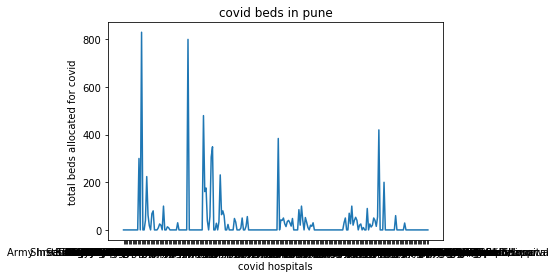

In [34]:
import matplotlib.pyplot as plt

# x axis values 
x = covid['hospital_details']
# corresponding y axis values 
y = covid['free_regulated_beds']
  
# plotting the points  
plt.plot(x,y) 
 
# naming the x axis 
plt.xlabel('covid hospitals') 
# naming the y axis 
plt.ylabel('total beds allocated for covid') 
  
# giving a title to my graph 
plt.title('covid beds in pune') 
  
# function to show the plot 
plt.show() 

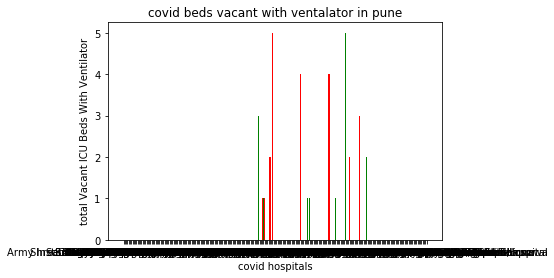

In [36]:
x = covid['hospital_details']
# corresponding y axis values 
y = covid['Vacant_ICU_Beds_With_Ventilator']
plt.xlabel('covid hospitals') 
# naming the y axis 
plt.ylabel('total Vacant ICU Beds With Ventilator') 
plt.bar(x, y, 
        width = 1, color = ['red', 'green'])  
plt.title('covid beds vacant with ventalator in pune') 
  
# function to show the plot 
plt.show() 

In [56]:
sub_data=covid[['area','hospital_details']]
sub_data1=sub_data.groupby('area').count()
sub_data1.sort_values('hospital_details',ascending=False)



,hospital_details
area,
PMC,97
Rural/DHO,62
PCMC,46
CS/Nagarpalika,24
Khadki Cantonment Board,4
Pune Cantonment,3
Dehuroad Cantonment Board,1


In [68]:
sub_data=covid[['charges','hospital_details']]
sub_data1=sub_data.groupby('charges').count()
sub_data1.sort_values('hospital_details',ascending=False)

,hospital_details
charges,
Chargeable,166
Government Free,45
MPJAY Free,15
MOU Free,11
